In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Load the dataset
file_path_1 = 'Dataset_01.csv'
file_path_2 = 'Dataset_02.csv'
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)


In [3]:
df1.shape

(100, 14)

In [4]:
df2.shape

(63, 18)

# Datasets Overview

These are small datasets:

## Dataset 01
- **Size**: 100 rows (samples)
- **Features**: 14 columns (categories/features)

## Dataset 02
- **Size**: 63 rows (samples)
- **Features**: 18 columns (categories/features)



In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


##### Both the datasets has **no null values.** 

In [28]:
df1.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [29]:
df2.head(5)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [30]:
#changing Order Date and Ship Date's datatypes from object to date.
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [32]:
df1['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [33]:
df1['Region'].nunique()

7

##### The sales data is divided into **07** regions.

In [34]:
df1['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

##### **Sub-Saharan Africa** has highesrt sales and **North America** has minimum sales.

In [35]:
df1['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [36]:
df1['Country'].nunique()

76

In [37]:
df1['Country'].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

##### The sales is happening in 76 countries, out of which **The Gambia** has maximum sales.

In [38]:
The_Gambia_samples = df1[df1['Country']=='The Gambia']

In [39]:
The_Gambia_samples

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
29,Sub-Saharan Africa,The Gambia,Household,Offline,L,2012-05-26,886494815,2012-06-09,2370,668.27,502.54,1583799.90,1191019.80,392780.10
37,Sub-Saharan Africa,The Gambia,Meat,Online,M,2017-01-14,825304400,2017-01-23,4767,421.89,364.69,2011149.63,1738477.23,272672.40
42,Sub-Saharan Africa,The Gambia,Cereal,Offline,H,2012-06-07,994022214,2012-06-08,2117,205.70,117.11,435466.90,247921.87,187545.03
87,Sub-Saharan Africa,The Gambia,Baby Food,Offline,M,2014-02-03,494747245,2014-03-20,5559,255.28,159.42,1419101.52,886215.78,532885.74


##### The Gambia is a country in Sub-Saharan Africa Region.

In [40]:
df1['Sales Channel'].unique()

array(['Offline', 'Online'], dtype=object)

##### We have two sales channel, online and offline. 

In [41]:
df1['Sales Channel'].nunique()

2

In [42]:
df1['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

##### Both the sales channel are equally effective.

In [43]:
df1['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [44]:
df1['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

# Types of Orders

There are four types of orders: **H** (high priority), **L** (low priority), **M** (medium priority), and **C** (canceled). **22%** of the orders experienced cancellations, a significant figure that necessitates our investigation into the cause.

## Possible Reasons for Order Cancellations

1. **Delivery Delays**  
   If the expected delivery time is longer than anticipated or if there are unforeseen delays, the customer may choose to cancel the order.

2. **Change of Mind**  
   The customer may simply change their mind about the purchase, either due to second thoughts or finding a better alternative elsewhere.

3. **Price Concerns**  
   Discovering a lower price elsewhere, or facing unexpected costs like shipping fees, can lead to order cancellations.

4. **Product Availability Issues**  
   If the product is out of stock, back-ordered, or the quantity available doesn't meet the customer’s needs, they may cancel the order.

5. **Poor Customer Experience**  
   Negative experiences such as difficulty in navigating the website, issues during checkout, or poor customer service can cause customers to abandon their orders.

6. **Payment Issues**  
   If the payment method fails, or there are concerns about security during payment, the customer might decide to cancel.

7. **Product Expectations**  
   The customer may realize that the product doesn't meet their expectations or requirements, either through reviews, further research, or by comparing it to other products.

8. **Shipping Costs**  
   High or unexpected shipping costs can deter customers from completing their purchases, leading to order cancellations.

9. **Concerns About Returns**  
   If the return policy is unfavorable or unclear, the customer may preemptively cancel the order to avoid future hassle.

10. **Personal Financial Issues**  
   The customer might face unexpected financial constraints or budget concerns, leading them to cancel their order.






In [47]:
Cancelled_orders = df1[df1['Order Priority']=='C']

In [48]:
Cancelled_orders

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
14,Asia,Mongolia,Personal Care,Offline,C,2014-02-19,832401311,2014-02-23,4901,81.73,56.67,400558.73,277739.67,122819.06
17,Sub-Saharan Africa,Cameroon,Beverages,Offline,C,2015-04-01,519820964,2015-04-18,5430,47.45,31.79,257653.50,172619.70,85033.80
28,Europe,Norway,Beverages,Offline,C,2014-07-18,435608613,2014-07-30,5124,47.45,31.79,243133.80,162891.96,80241.84
31,Sub-Saharan Africa,South Sudan,Personal Care,Offline,C,2013-12-29,406502997,2014-01-28,2125,81.73,56.67,173676.25,120423.75,53252.50
32,Australia and Oceania,Australia,Office Supplies,Online,C,2015-10-27,158535134,2015-11-25,2924,651.21,524.96,1904138.04,1534983.04,369155.00
46,Europe,Iceland,Cosmetics,Online,C,2016-12-31,331438481,2016-12-31,8867,437.20,263.33,3876652.40,2334947.11,1541705.29
48,Europe,Macedonia,Clothes,Offline,C,2014-10-14,787399423,2014-11-14,7842,109.28,35.84,856973.76,281057.28,575916.48


In [49]:
Cancelled_orders['Sales Channel'].value_counts()

Sales Channel
Offline    13
Online      9
Name: count, dtype: int64

##### More number of offline orders are being cancelled than the online orders it implies that there is some probloem in **offline stores.**

In [50]:
Delivery_Duration = (df1['Ship Date'] - df1['Order Date']).dt.days


In [51]:
Delivery_Duration

0     30
1     24
2      6
3     15
4      5
      ..
95    39
96    47
97    28
98     9
99     5
Length: 100, dtype: int64

In [52]:
Delivery_Duration_C = (Cancelled_orders['Ship Date'] - Cancelled_orders['Order Date']).dt.days

In [53]:
Delivery_Duration_C

1     24
3     15
5     17
14     4
17    17
28    12
31    30
32    29
46     0
48    31
49     2
50    44
55    19
56    32
72    50
75    36
76    18
77    38
86     5
89    33
94    41
97    28
dtype: int64

In [56]:
Delivery_Duration_C.describe()

count    22.000000
mean     23.863636
std      14.109421
min       0.000000
25%      15.500000
50%      26.000000
75%      32.750000
max      50.000000
dtype: float64

In [57]:
Delivery_Duration.describe()

count    100.000000
mean      23.360000
std       14.742586
min        0.000000
25%        9.750000
50%       23.500000
75%       36.250000
max       50.000000
dtype: float64

##### It apperas that delivery duration is **not** the main reason for cancelling the order.

In [58]:
Cancelled_orders['Region'].value_counts()

Region
Sub-Saharan Africa                   8
Europe                               5
Australia and Oceania                4
Central America and the Caribbean    2
Asia                                 2
North America                        1
Name: count, dtype: int64

In [60]:
Cancelled_orders['Country'].value_counts()

Country
Sao Tome and Principe               2
Grenada                             1
Albania                             1
Nicaragua                           1
Slovenia                            1
Laos                                1
Federated States of Micronesia      1
Mexico                              1
Democratic Republic of the Congo    1
Fiji                                1
Cote d'Ivoire                       1
Mauritania                          1
Macedonia                           1
Iceland                             1
Australia                           1
South Sudan                         1
Norway                              1
Cameroon                            1
Mongolia                            1
Solomon Islands                     1
Sierra Leone                        1
Name: count, dtype: int64

In [66]:
Cancelled_orders['Item Type'].unique()

array(['Cereal', 'Fruits', 'Baby Food', 'Personal Care', 'Beverages',
       'Office Supplies', 'Cosmetics', 'Clothes', 'Household',
       'Vegetables'], dtype=object)

In [67]:
Cancelled_orders['Item Type'].nunique()

10

In [65]:
Cancelled_orders['Item Type'].value_counts()

Item Type
Beverages          7
Clothes            4
Personal Care      2
Office Supplies    2
Vegetables         2
Cereal             1
Fruits             1
Baby Food          1
Cosmetics          1
Household          1
Name: count, dtype: int64

##### It implies that the **beverages** order are cancelled for majority of the times.

In [62]:
df1['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [63]:
df1['Item Type'].nunique()

12

In [64]:
df1['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

##### Out of 08 Beverages, 07 got cancelled whereas **Meat** and **Snacks** never get cancelled.

In [68]:
df1['Delivery Duration'] = Delivery_Duration

In [69]:
df1

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery Duration
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,39
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,28
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,9


##### Added a new column called Delviery Duration in  the dataset.

In [75]:
Region_data = df1.groupby('Region').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}).reset_index()

In [71]:
Region_data

,Region,Total Revenue,Total Profit
0,Asia,21347091.02,6113845.87
1,Australia and Oceania,14094265.13,4722160.03
2,Central America and the Caribbean,9170385.49,2846907.85
3,Europe,33368932.11,11082938.63
4,Middle East and North Africa,14052706.58,5761191.86
5,North America,5643356.55,1457942.76
6,Sub-Saharan Africa,39672031.43,12183211.40


In [77]:
Region_data.sort_values(by = 'Total Profit',  ascending=False)

,Region,Total Revenue,Total Profit
6,Sub-Saharan Africa,39672031.43,12183211.40
3,Europe,33368932.11,11082938.63
0,Asia,21347091.02,6113845.87
4,Middle East and North Africa,14052706.58,5761191.86
1,Australia and Oceania,14094265.13,4722160.03
2,Central America and the Caribbean,9170385.49,2846907.85
5,North America,5643356.55,1457942.76


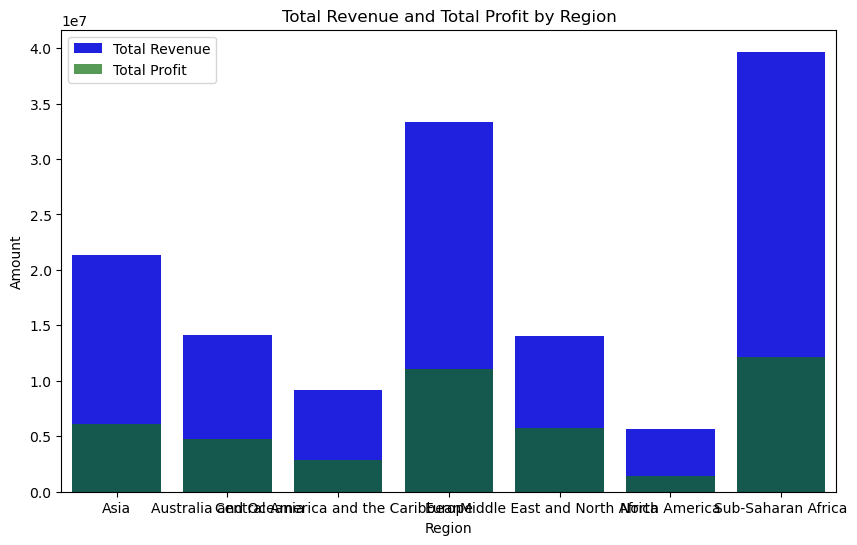

In [80]:
# Step 2: Plot the data
plt.figure(figsize=(10, 6))

# Plotting Total Revenue
sns.barplot(x='Region', y='Total Revenue', data=Region_data, color='blue', label='Total Revenue')

# Plotting Total Profit
sns.barplot(x='Region', y='Total Profit', data=Region_data, color='green', label='Total Profit', alpha=0.7)

# Step 3: Add titles and labels
plt.title('Total Revenue and Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()

In [82]:
## Continue from here 
Region_data_sales_channel = df1.groupby('Region').agg({'Sales Channel': 'sum'}).reset_index()

In [83]:
Region_data_sales_channel

,Region,Sales Channel
0,Asia,OnlineOnlineOfflineOfflineOfflineOfflineOnline...
1,Australia and Oceania,OfflineOnlineOnlineOnlineOnlineOnlineOfflineOf...
2,Central America and the Caribbean,OnlineOfflineOnlineOfflineOfflineOfflineOffline
3,Europe,OfflineOnlineOnlineOnlineOnlineOnlineOfflineOf...
4,Middle East and North Africa,OnlineOnlineOnlineOfflineOnlineOfflineOnlineOn...
5,North America,OfflineOfflineOffline
6,Sub-Saharan Africa,OnlineOfflineOfflineOnlineOfflineOnlineOffline...


In [84]:
channel_mapping = {'Online': '01', 'Offline': '02'}
df1['Sales Channel Label'] = df1['Sales Channel'].map(channel_mapping)


In [86]:
Region_data_sales_channel = df1.groupby('Region').agg({'Sales Channel Label': 'sum'}).reset_index()

In [87]:
Region_data_sales_channel

,Region,Sales Channel Label
0,Asia,0101020202020101010202
1,Australia and Oceania,0201010101010202010102
2,Central America and the Caribbean,01020102020202
3,Europe,02010101010102020101010102010201010202020201
4,Middle East and North Africa,01010102010201010101
5,North America,020202
6,Sub-Saharan Africa,0102020102010202010202010101020202010202010201...


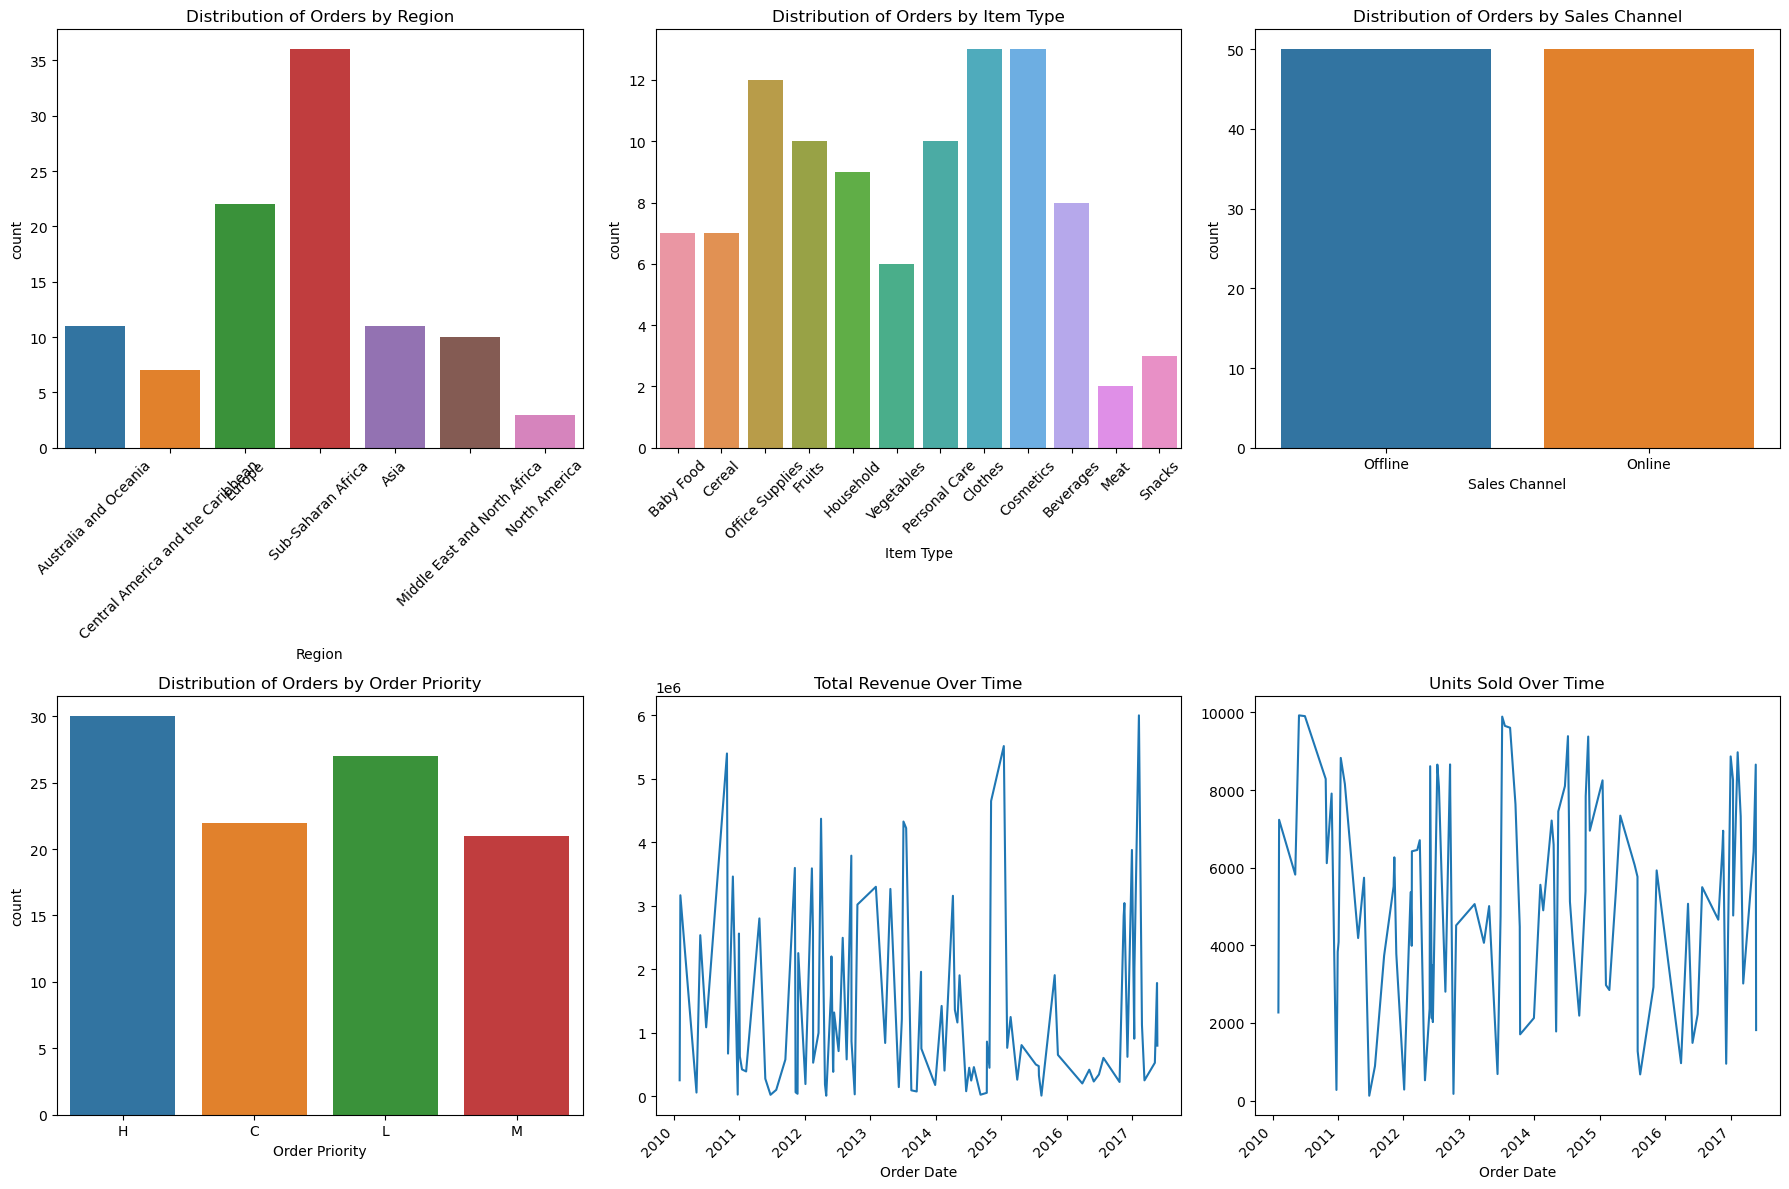

ValueError: could not convert string to float: 'Australia and Oceania'

<Figure size 1000x600 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

# Set up the figure and axes for multiple plots
plt.figure(figsize=(18, 12))

# 1. Bar plot for categorical columns
plt.subplot(2, 3, 1)
sns.countplot(data=df1, x='Region')
plt.title('Distribution of Orders by Region')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(data=df1, x='Item Type')
plt.title('Distribution of Orders by Item Type')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.countplot(data=df1, x='Sales Channel')
plt.title('Distribution of Orders by Sales Channel')

plt.subplot(2, 3, 4)
sns.countplot(data=df1, x='Order Priority')
plt.title('Distribution of Orders by Order Priority')

# 2. Line plot for time series analysis
plt.subplot(2, 3, 5)
df1.groupby('Order Date')['Total Revenue'].sum().plot()
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
df1.groupby('Order Date')['Units Sold'].sum().plot()
plt.title('Units Sold Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Box plots and violin plots for comparative analysis
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=df1, x='Item Type', y='Total Profit')
plt.title('Total Profit by Item Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(data=df1, x='Order Priority', y='Total Revenue')
plt.title('Total Revenue by Order Priority')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


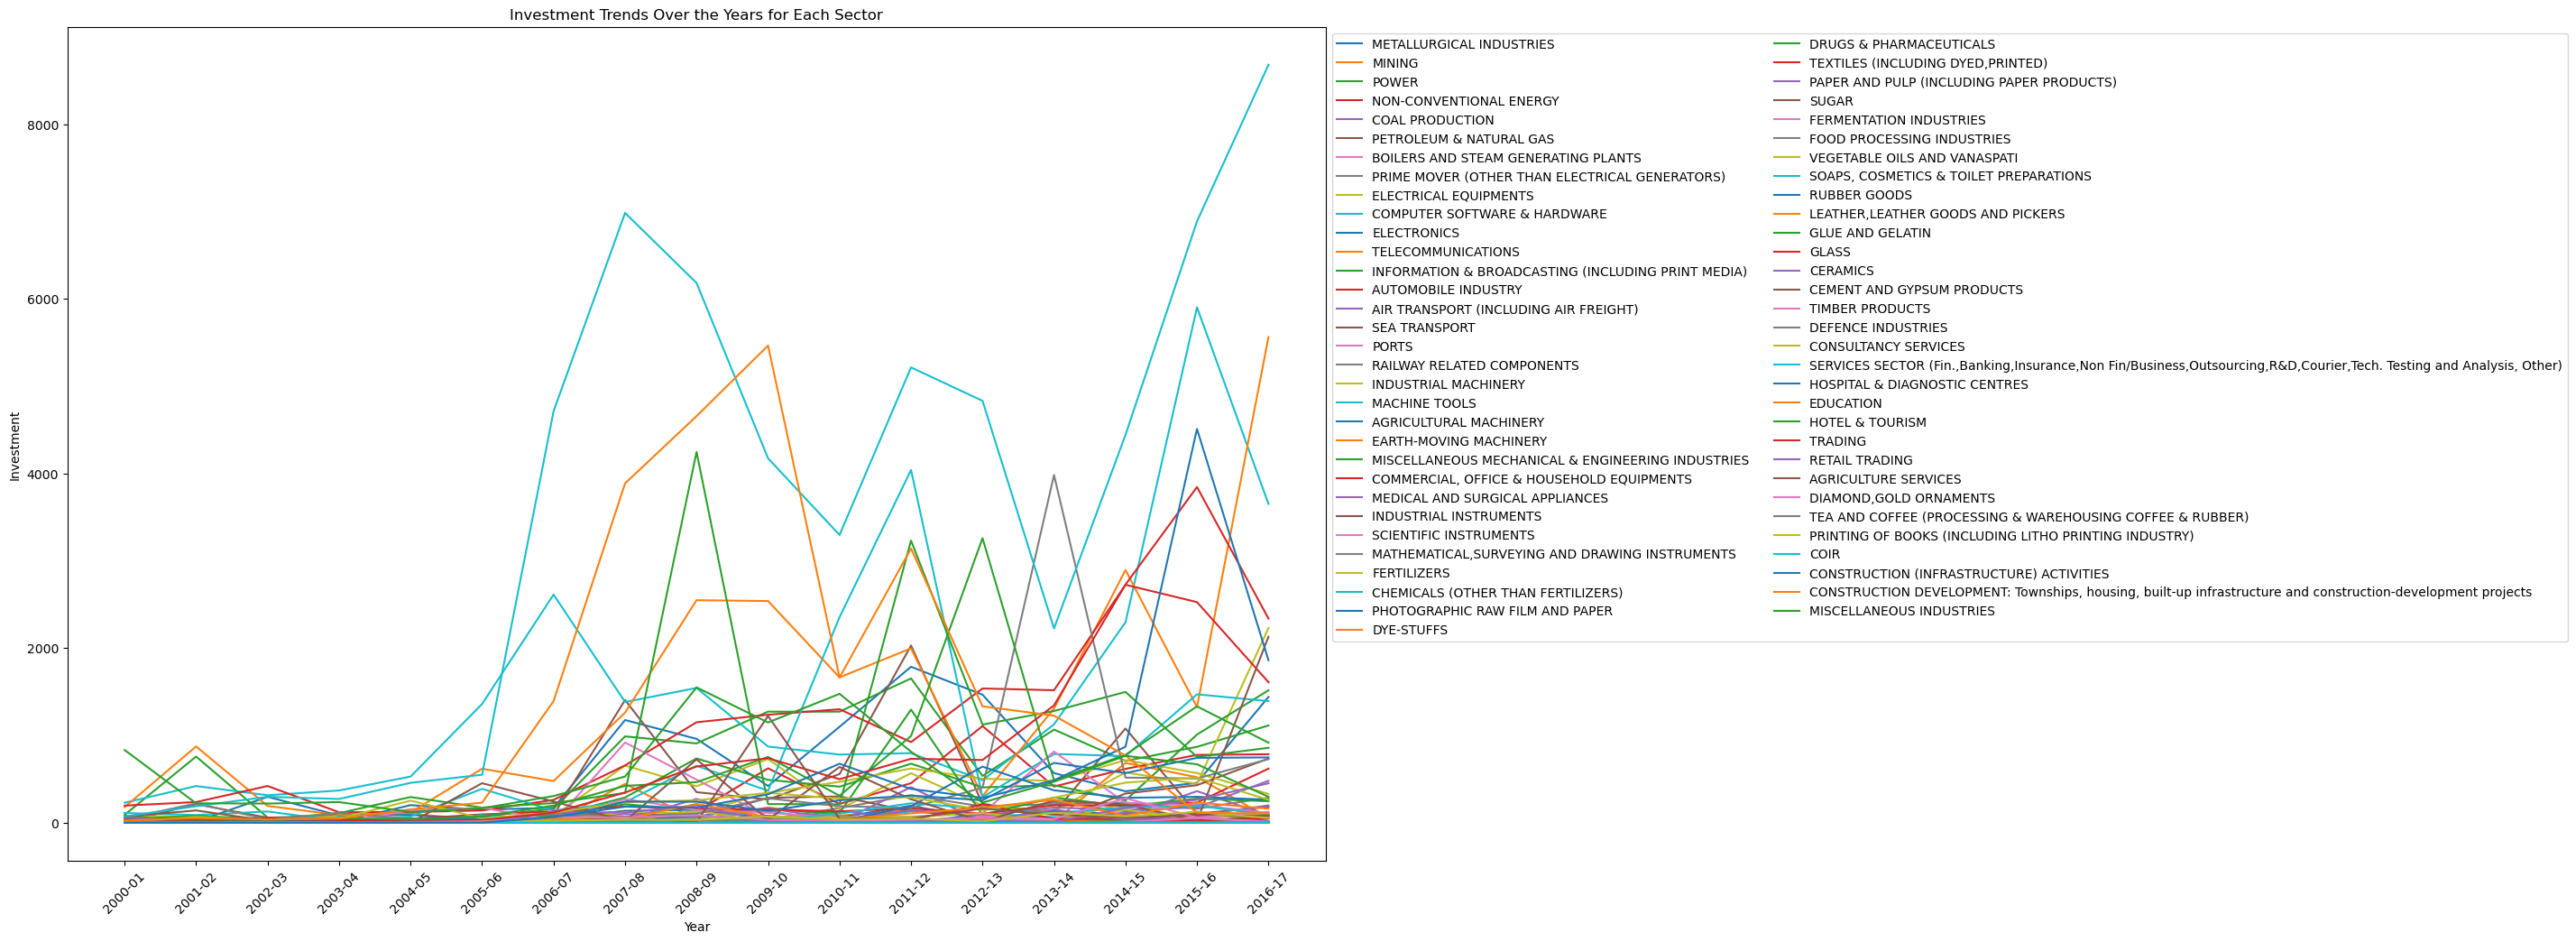

<Figure size 1800x800 with 0 Axes>

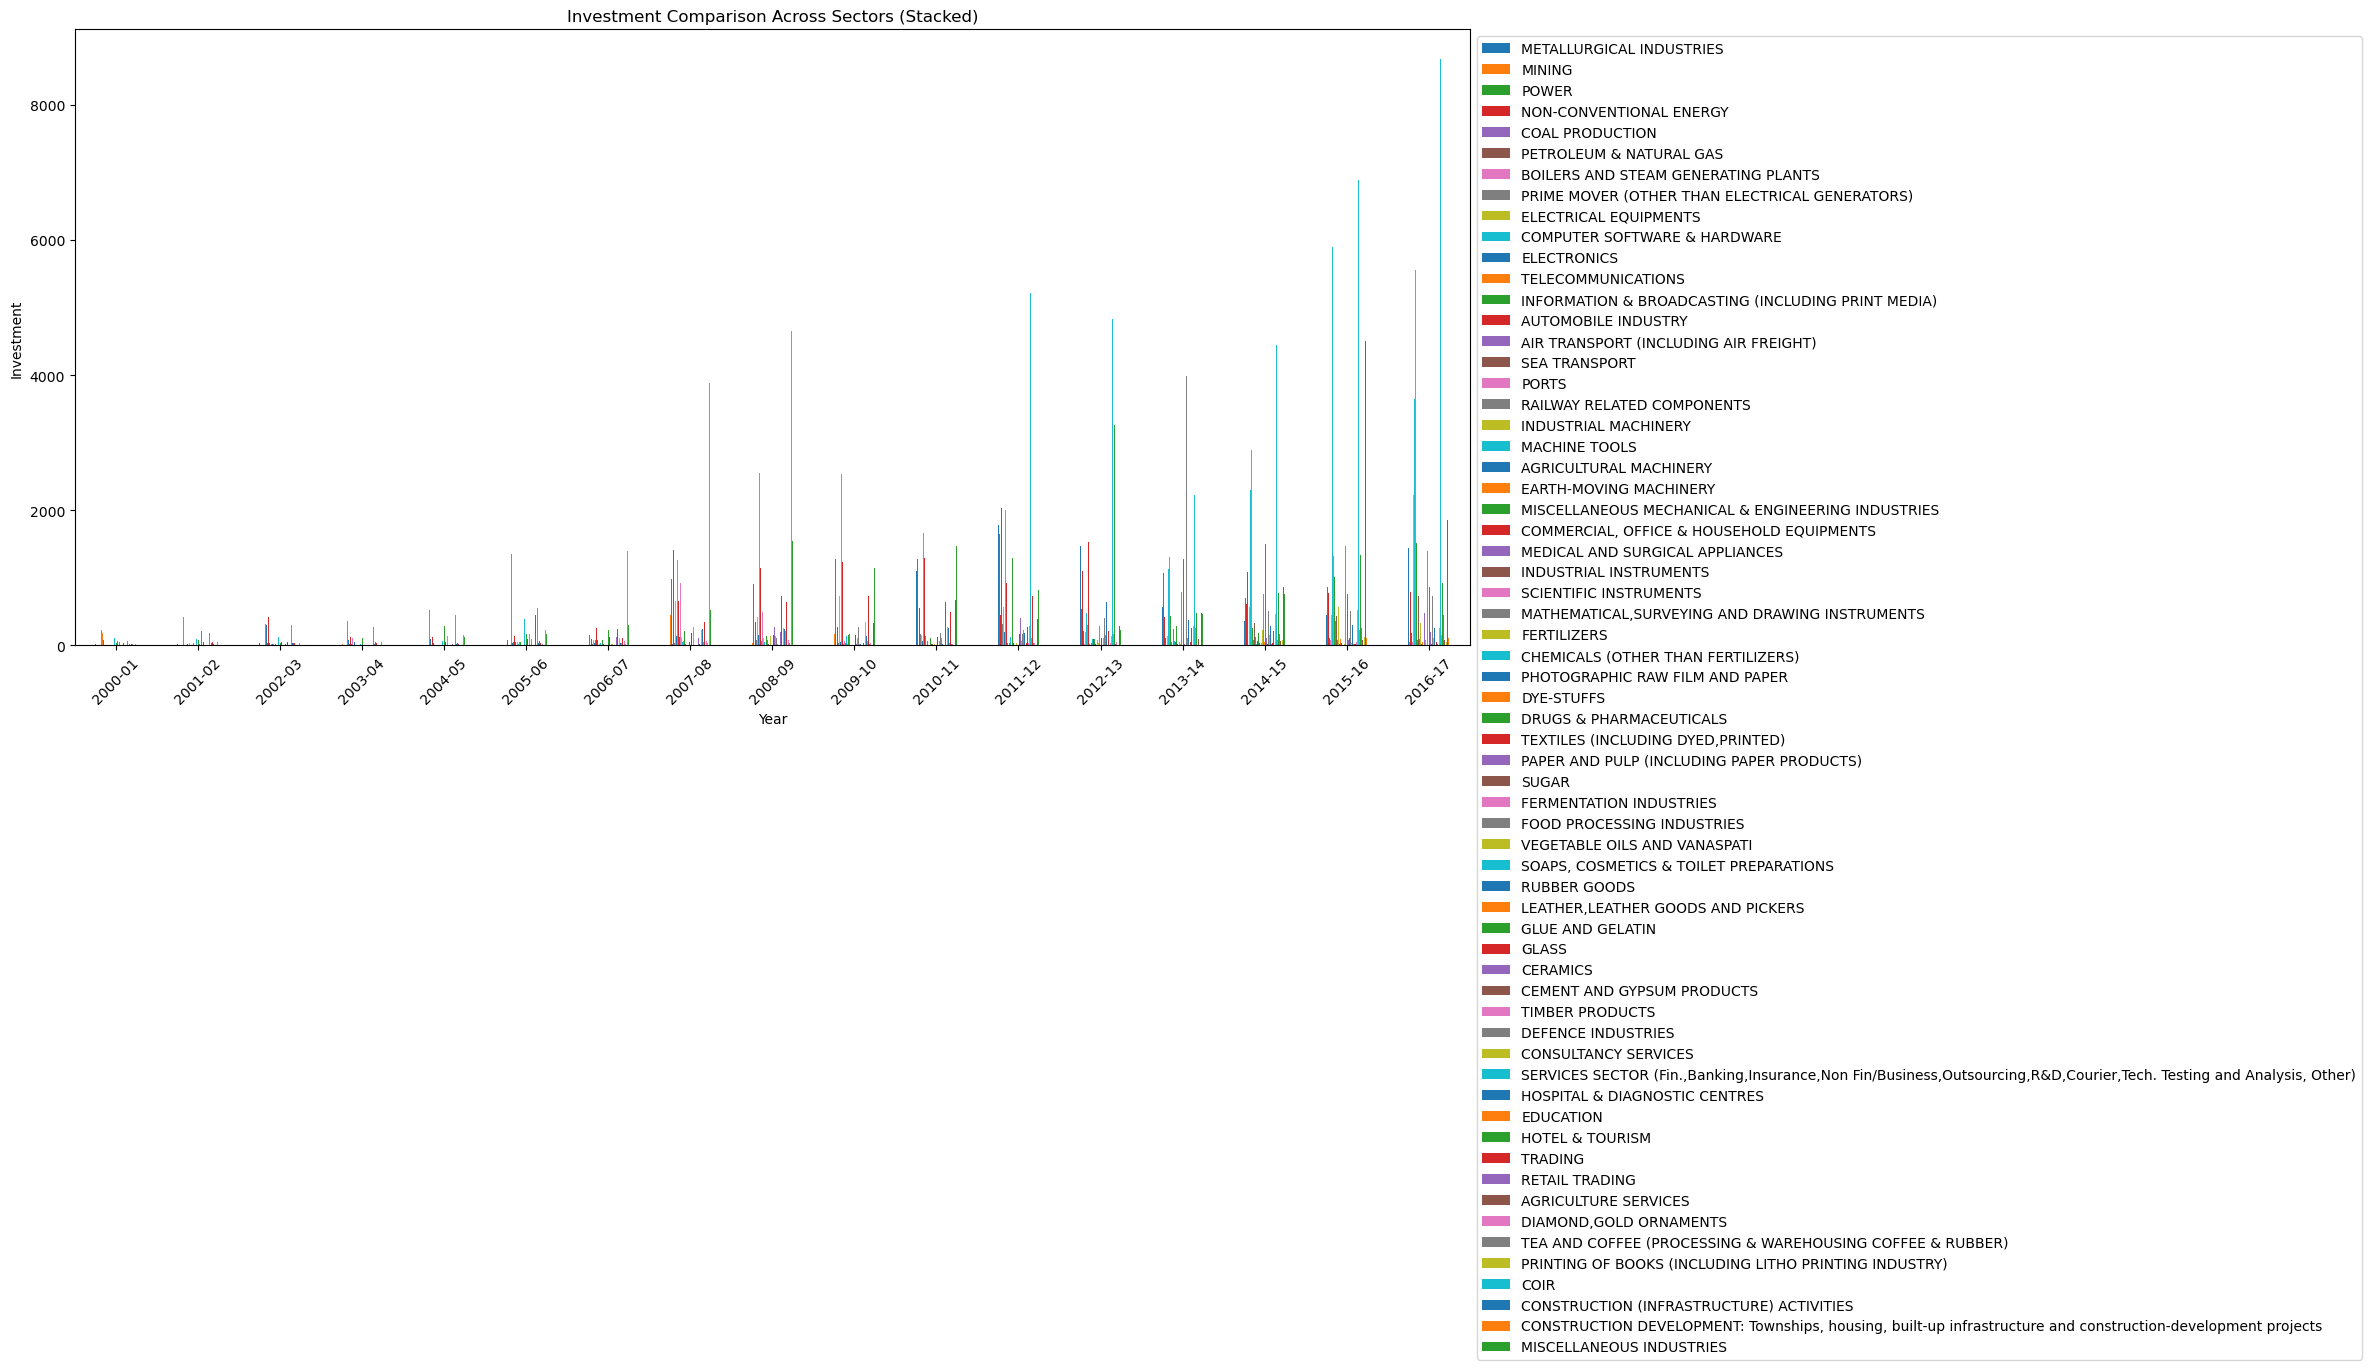

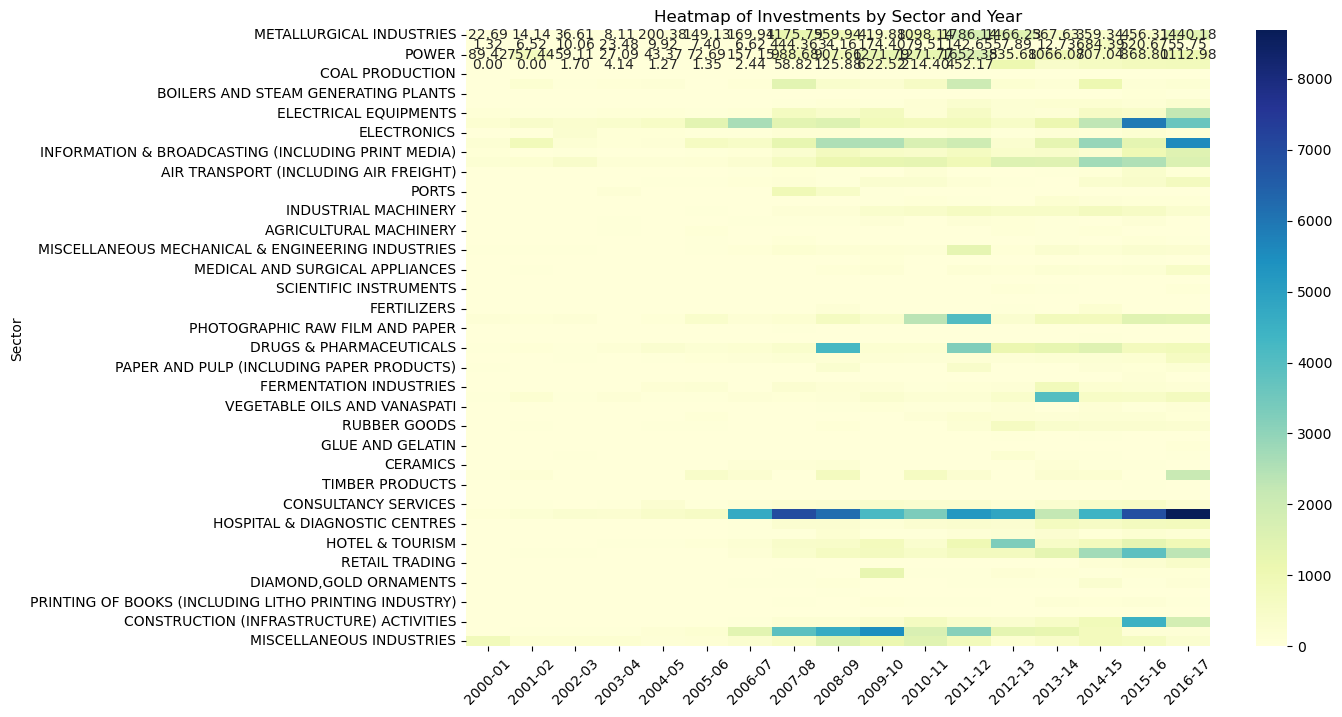

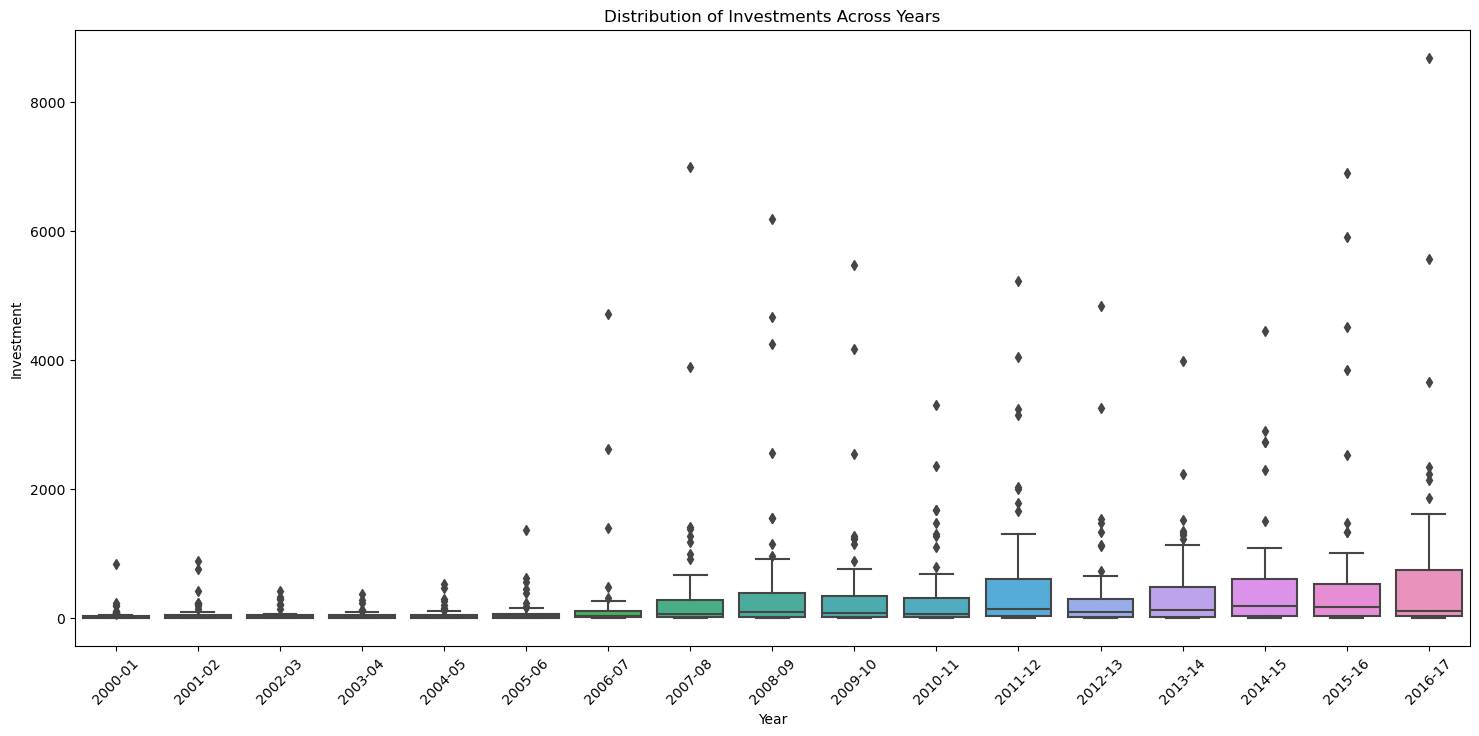

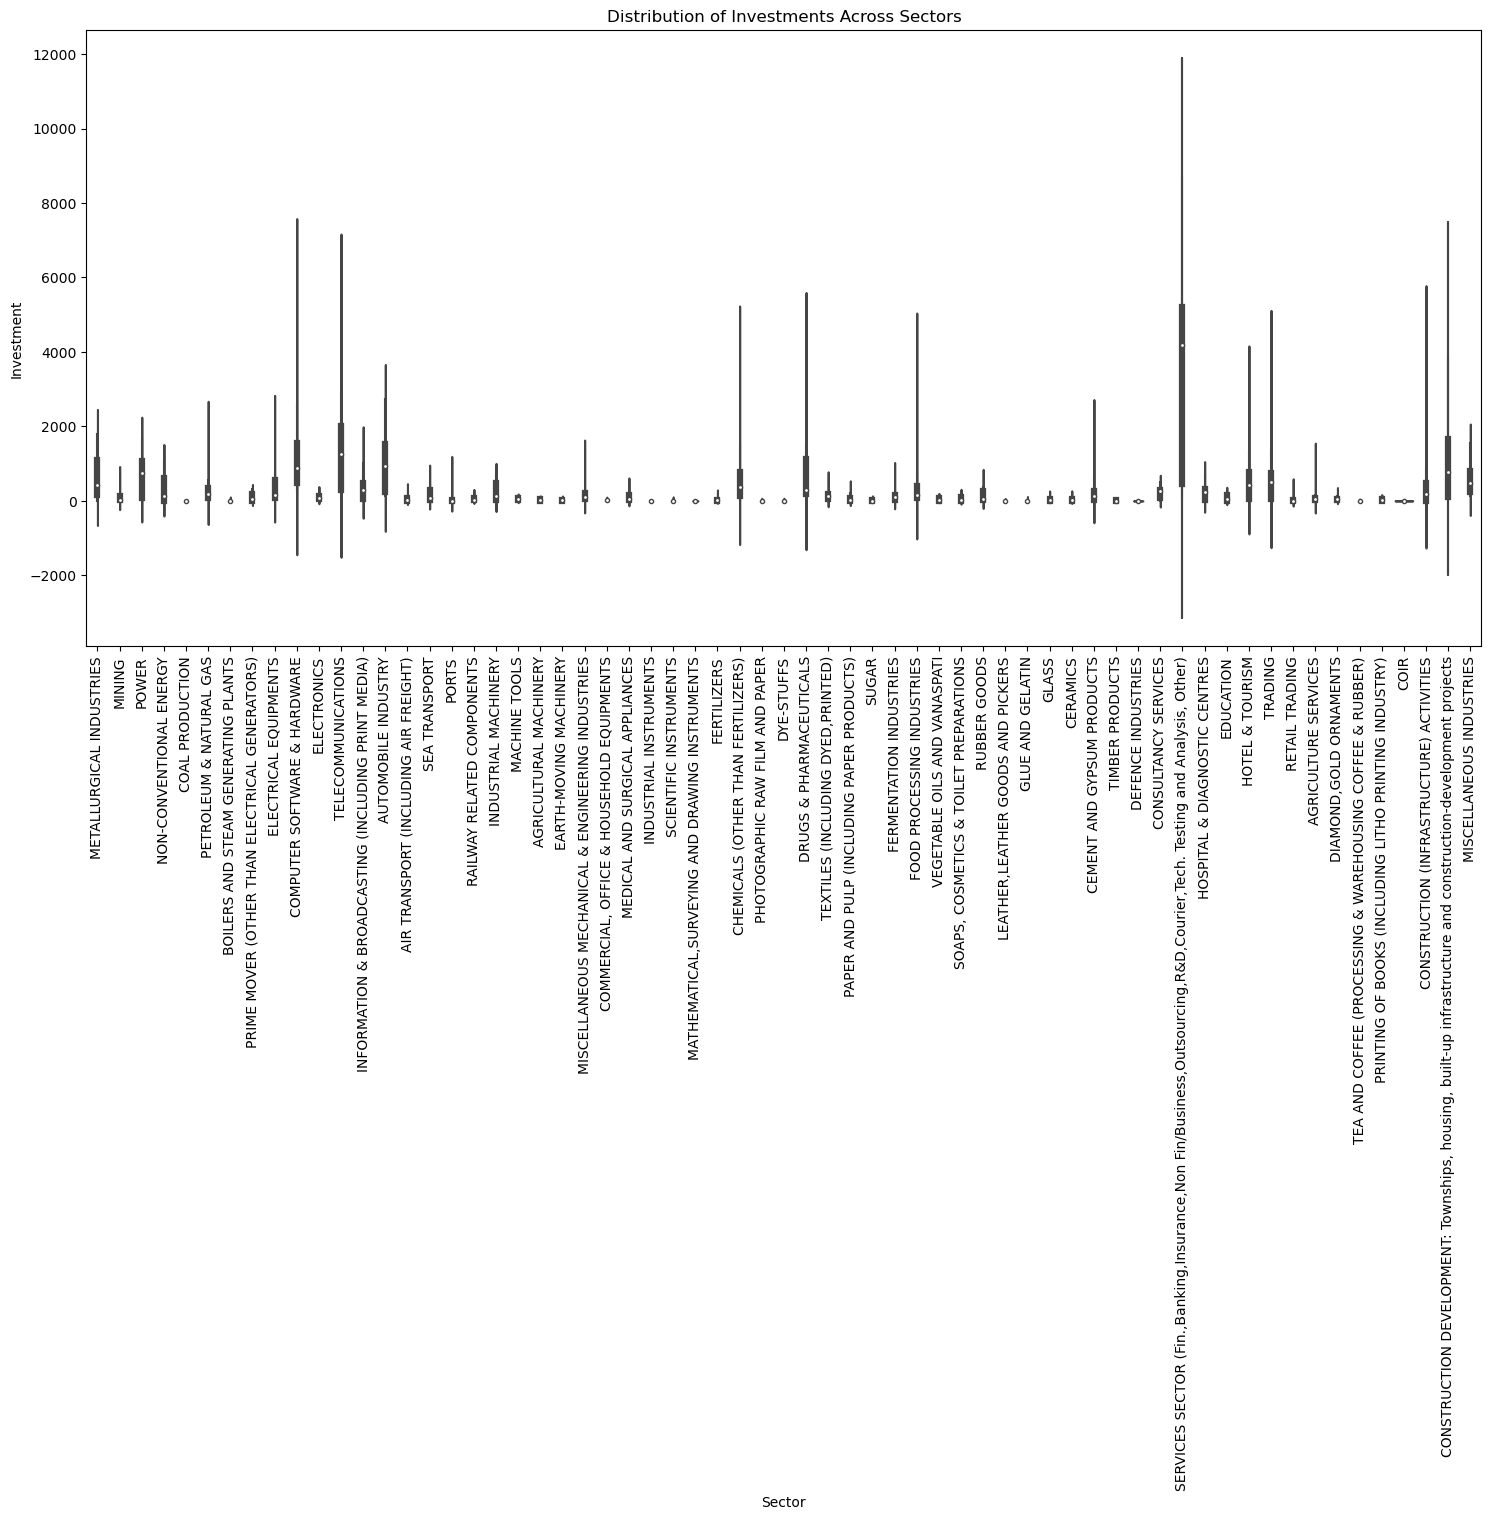

In [10]:
# Set up the figure and axes for multiple plots
plt.figure(figsize=(18, 12))

# 1. Line plot for trend analysis
for sector in df2['Sector']:
    plt.plot(df2.columns[1:], df2[df2['Sector'] == sector].values.flatten()[1:], label=sector)
plt.title('Investment Trends Over the Years for Each Sector')
plt.xlabel('Year')
plt.ylabel('Investment')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.xticks(rotation=45)
plt.show()

# 2. Bar plots for comparative analysis
plt.figure(figsize=(18, 8))
df2.set_index('Sector').T.plot(kind='bar', stacked=False, figsize=(18, 8))
plt.title('Investment Comparison Across Sectors (Stacked)')
plt.xlabel('Year')
plt.ylabel('Investment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# 3. Heatmap for sector-year investment intensity
plt.figure(figsize=(12, 8))
sns.heatmap(df2.set_index('Sector'), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of Investments by Sector and Year')
plt.xticks(rotation=45)
plt.show()

# 4. Box plots for distribution analysis
plt.figure(figsize=(18, 8))
sns.boxplot(data=df2.melt(id_vars=['Sector'], var_name='Year', value_name='Investment'), x='Year', y='Investment')
plt.title('Distribution of Investments Across Years')
plt.xticks(rotation=45)
plt.show()

# 5. Violin plots for sector-wise distribution analysis
plt.figure(figsize=(18, 8))
sns.violinplot(data=df2.melt(id_vars=['Sector'], var_name='Year', value_name='Investment'), x='Sector', y='Investment')
plt.title('Distribution of Investments Across Sectors')
plt.xticks(rotation=90)
plt.show()
